In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [40]:
df=pd.read_csv('Desktop/energyconsumption_AV.csv')
df.head()

,DATE,ENERGY_INDEX
0,Jan-39,3.3842
1,Feb-39,3.4100
2,Mar-39,3.4875
3,Apr-39,3.5133
4,May-39,3.5133


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 969 entries, 1939-01-01 to 2019-09-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    969 non-null    datetime64[ns]
 1   Energy  969 non-null    float64       
 2   DATE    969 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 30.3 KB


In [108]:
df.to_csv('energy_data.csv')

In [103]:
test_size = 36

train_data = df[:-test_size]
valid_data = df[-test_size:]

In [104]:
len(train_data)

933

In [105]:
len(valid_data)

36

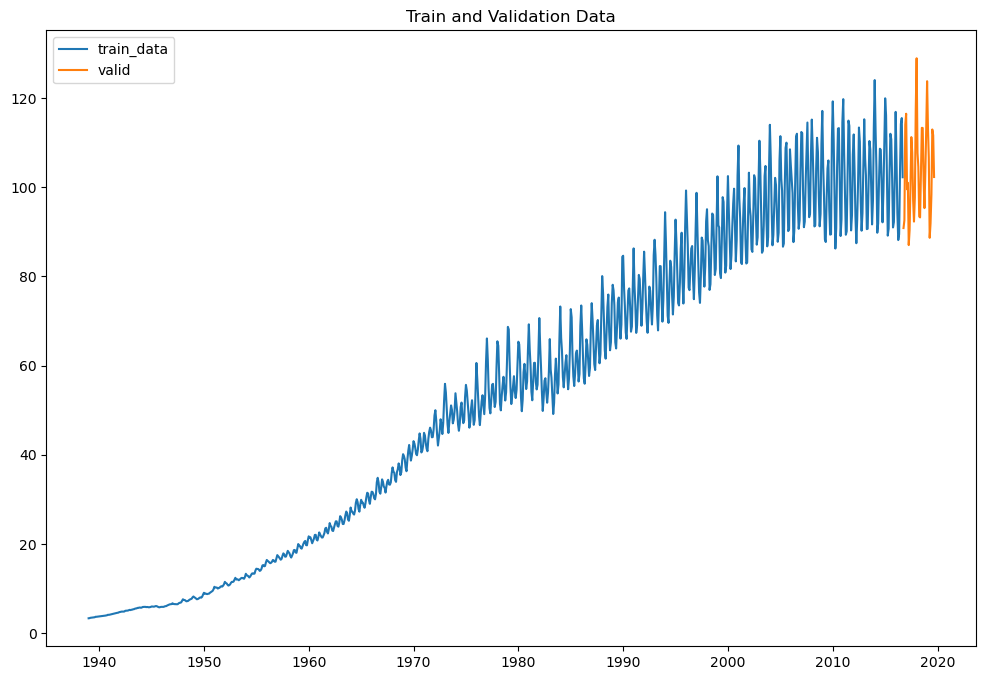

In [107]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Energy'], label='train_data')
plt.plot(valid_data.index,valid_data['Energy'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Exponential Smoothing

In [109]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [141]:
model = SimpleExpSmoothing(np.asarray(train_data['Energy']))
model = model.fit(smoothing_level=0.9,optimized=False) 

valid_data['SES'] = model.forecast(len(valid_data)) 

In [142]:
model.params

{'smoothing_level': 0.9,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.3842,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

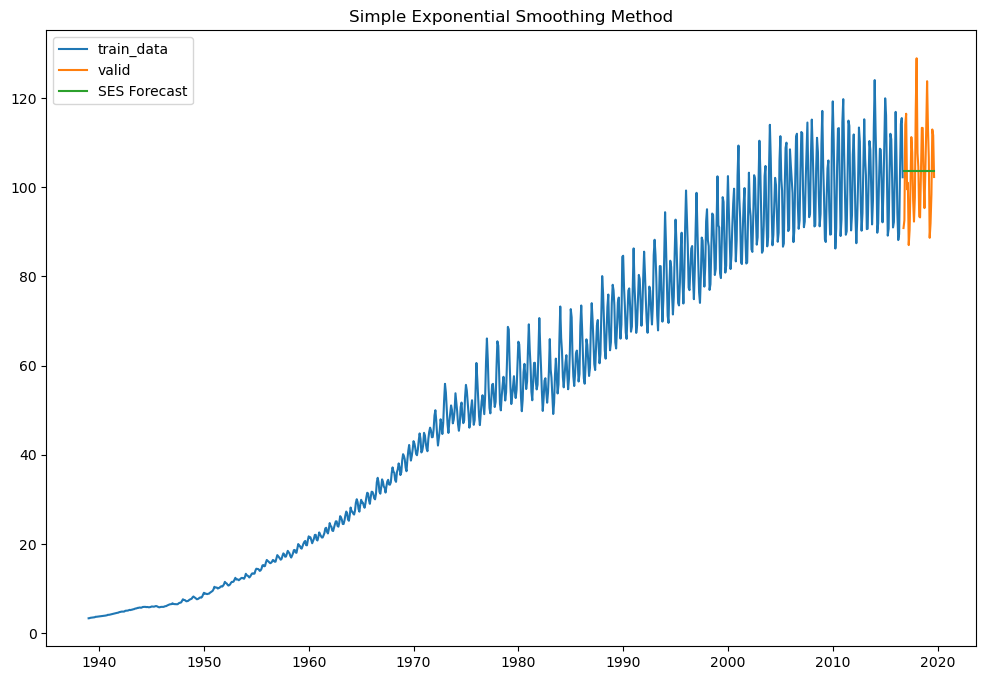

In [143]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Energy'], label='train_data')
plt.plot(valid_data.index,valid_data['Energy'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [144]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['Energy'], valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

The RMSE value for Simple Exponential Smoothing Method is 10.232451008883304


For smoothing level 0.9, RMSE is observed lowest compared to others.

# Double Exponential Smoothing

In [145]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [198]:
model = ExponentialSmoothing(np.asarray(train_data['Energy']), trend='add')
model = model.fit(smoothing_level=1.0, smoothing_slope=0.0001) 

valid_data['Holt_linear'] = model.forecast(len(valid_data))

In [199]:
model.params

{'smoothing_level': 1.0,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.2780001346676544,
 'initial_trend': 0.10605346038549741,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

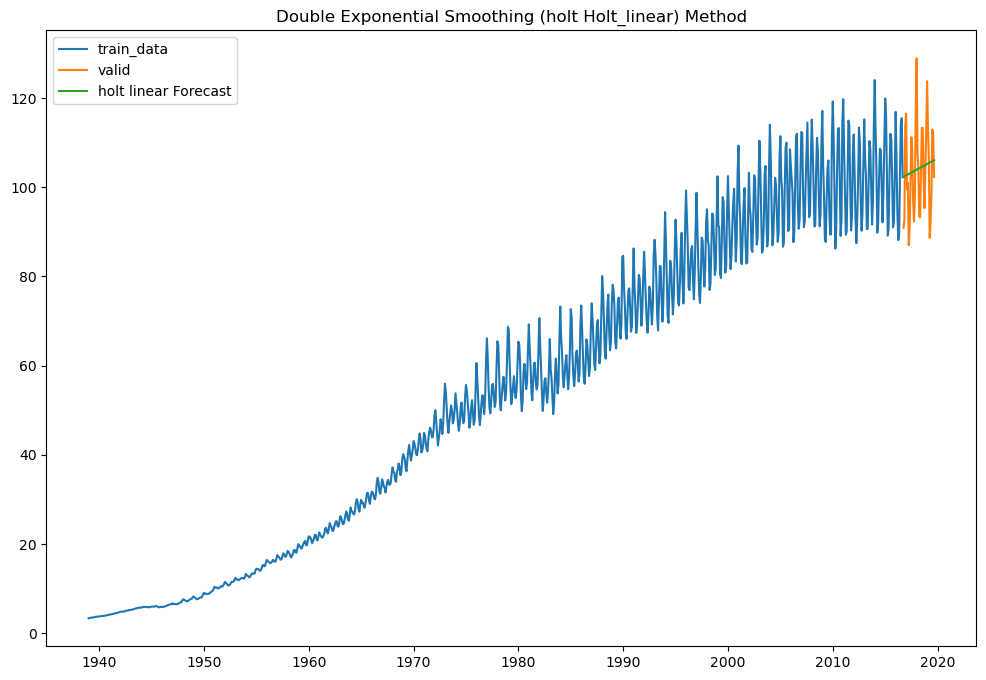

In [200]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Energy'], label='train_data')
plt.plot(valid_data.index,valid_data['Energy'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [201]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['Energy'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

The RMSE value for Holt Linear Method is 10.109149476318377


Smoothing level 1.0 is giving best result with trend='add' 

multiplicative trend is not giving good result.

# Holt's Winters (Triple exponential smoothing)

In [202]:
from statsmodels.tsa.api import ExponentialSmoothing

In [241]:
model = ExponentialSmoothing(np.asarray(train_data['Energy']) ,seasonal_periods=12 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.1, smoothing_seasonal=0.2) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [242]:
model.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 2.585325070276994,
 'initial_trend': 0.04022699309647803,
 'initial_seasons': array([1.32791327, 1.30873656, 1.2702927 , 1.19619294, 1.10704896,
        1.04667968, 1.01493662, 1.02753038, 1.07138583, 1.12809412,
        1.20795816, 1.2842486 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [243]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['Energy'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 7.006887486239924


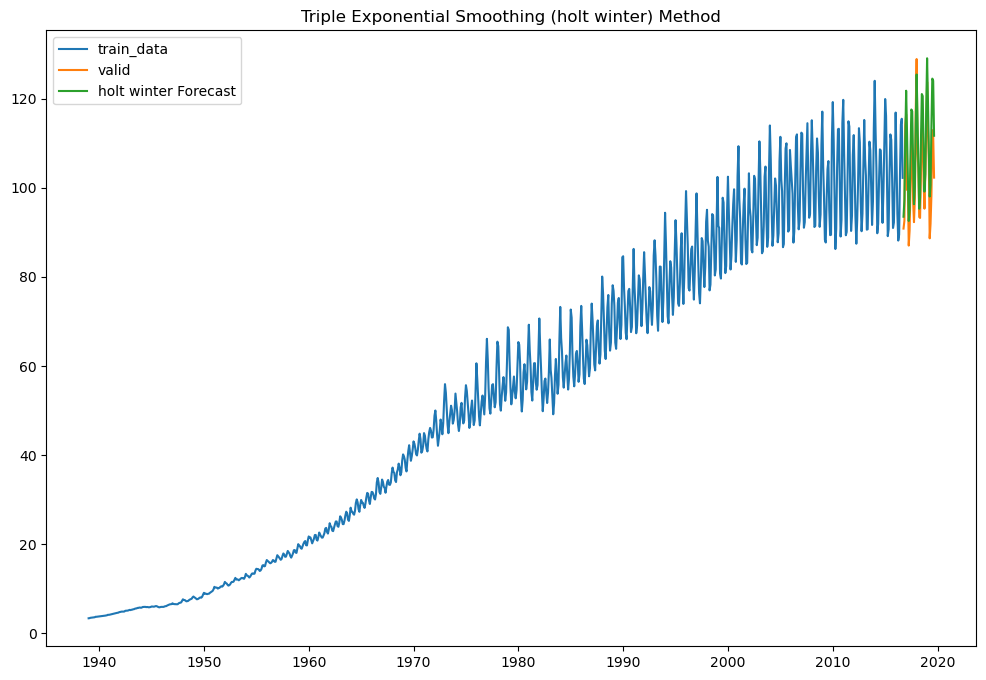

In [244]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Energy'], label='train_data')
plt.plot(valid_data.index,valid_data['Energy'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

seasonal_periods=12, smoothing_seasonal=0.2 are giving good results.

# Making Series Stationary

In [245]:
train_data['diff'] = train_data['Energy'] - train_data['Energy'].shift(1)

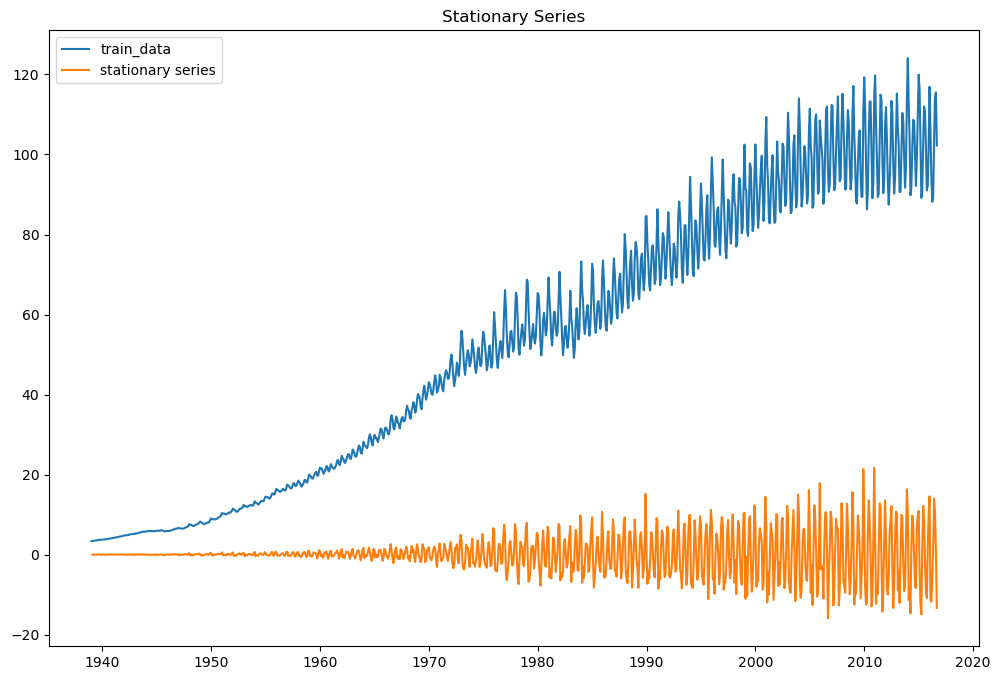

In [246]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Energy'], label='train_data')
plt.plot(train_data.index,train_data['diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [248]:
train_data['Energy_log'] = np.log(train_data['Energy'])
train_data['Energy_log_diff'] = train_data['Energy_log'] - train_data['Energy_log'].shift(1)

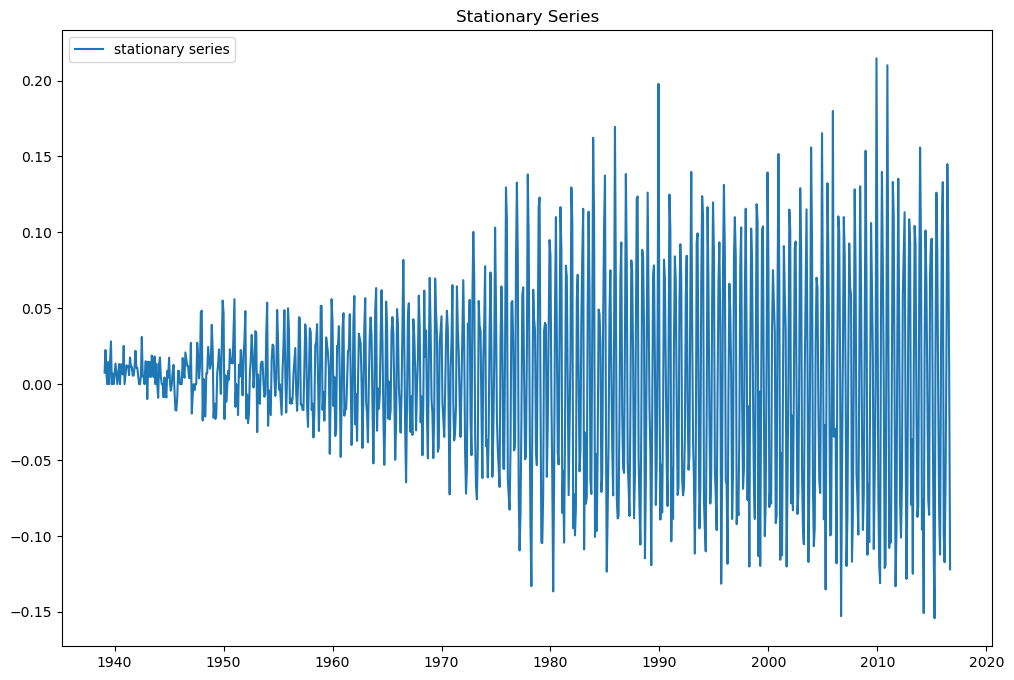

In [249]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['Energy_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [251]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [252]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [253]:
adf_test(train_data['Energy_log_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -5.150907
p-value                          0.000011
#Lags Used                      21.000000
Number of Observations Used    910.000000
Critical Value (1%)             -3.437556
Critical Value (5%)             -2.864721
Critical Value (10%)            -2.568464
dtype: float64


In [254]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [255]:
kpss_test(train_data['Energy_log_diff'].dropna())

Results of KPSS Test:
Test Statistic            1.045914
p-value                   0.010000
Lags Used                37.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\abhij\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# ACF and PACF plots

In [257]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

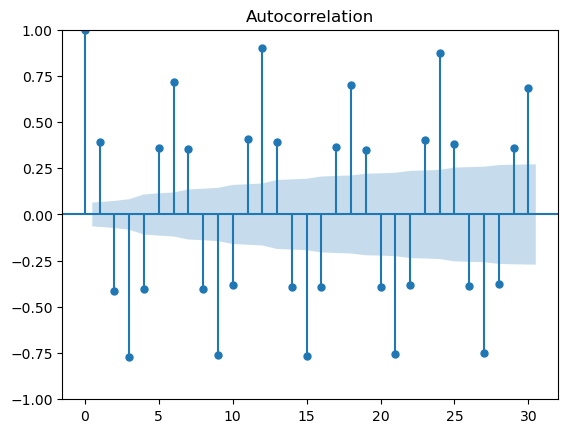

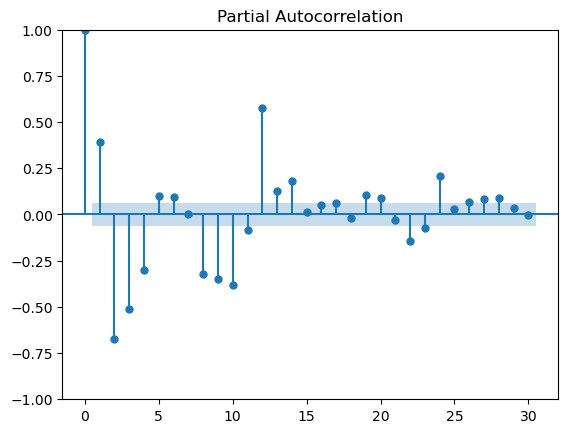

In [258]:
plot_acf(train_data['Energy_log_diff'].dropna(), lags=30)
plot_pacf(train_data['Energy_log_diff'].dropna(), lags=30)
plt.show()

# SARIMA

In [261]:
from statsmodels.tsa.statespace import sarimax

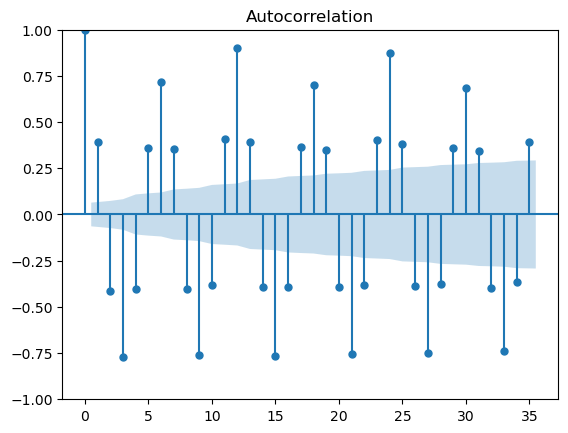

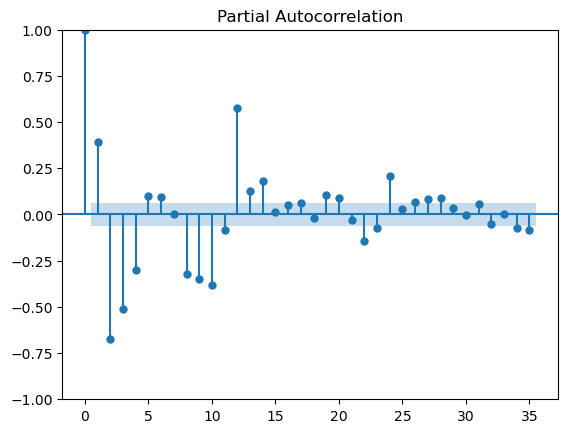

In [262]:
plot_acf(train_data['Energy_log_diff'].dropna(), lags=35)
plot_pacf(train_data['Energy_log_diff'].dropna(), lags=35)
plt.show()

In [263]:
train_data['Energy_log'] = np.log(train_data['Energy'])
train_data['Energy_log_diff'] = train_data['Energy_log'] - train_data['Energy_log'].shift(12)

In [264]:
train_data['Energy_log_diff'].head(15)

Date
1939-01-01         NaN
1939-02-01         NaN
1939-03-01         NaN
1939-04-01         NaN
1939-05-01         NaN
1939-06-01         NaN
1939-07-01         NaN
1939-08-01         NaN
1939-09-01         NaN
1939-10-01         NaN
1939-11-01         NaN
1939-12-01         NaN
1940-01-01    0.108408
1940-02-01    0.114402
1940-03-01    0.098680
Name: Energy_log_diff, dtype: float64

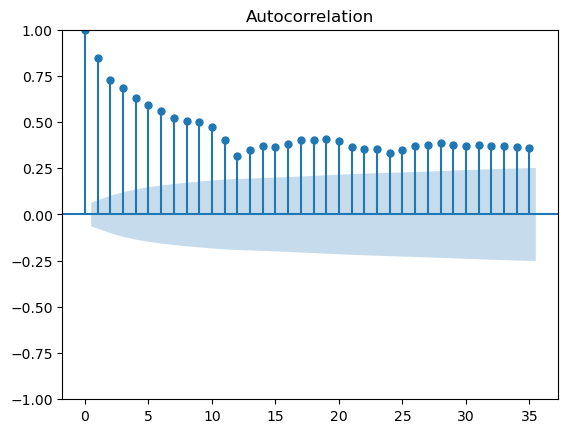

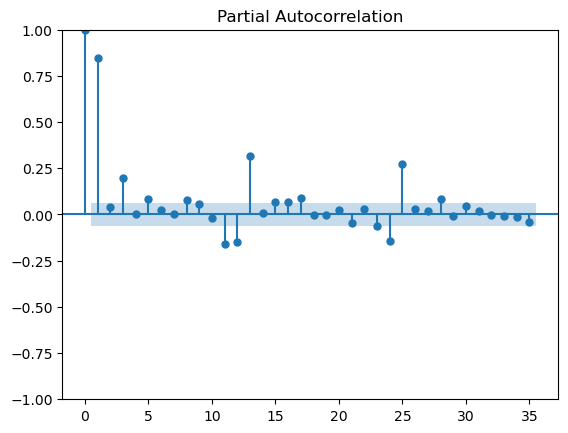

In [265]:
plot_acf(train_data['Energy_log_diff'].dropna(), lags=35)
plot_pacf(train_data['Energy_log_diff'].dropna(), lags=35)
plt.show()

In [277]:
# fit model
model = sarimax.SARIMAX(train_data['Energy_log'], seasonal_order=(1,1,1,12), order=(2,1,2))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="2016-10-01", end="2019-09-01", dynamic=True)

C:\Users\abhij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abhij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abhij\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [278]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

In [279]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['Energy'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 4.2139843904083145


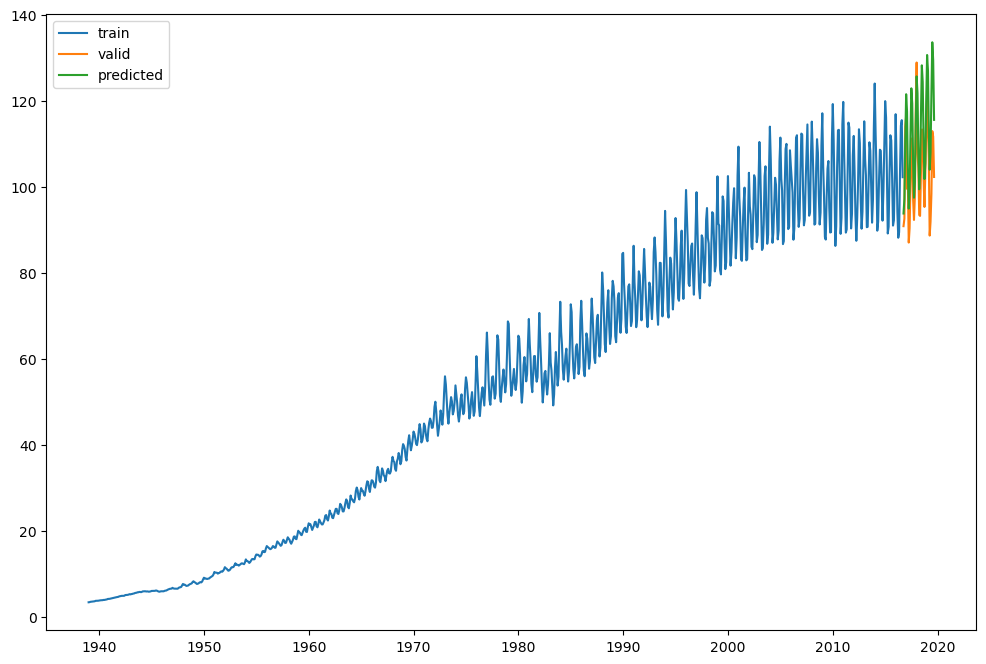

In [276]:
plt.figure(figsize=(12,8))

plt.plot(train_data['Energy'],  label='train') 
plt.plot(valid_data['Energy'],  label='valid') 
plt.plot(valid_data['SARIMA'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

With hyperparameter { seasonal_order=(1,1,1,12), order=(2,1,2)}, SARIMA is giving best results.

In [283]:
train_data.to_csv('train_energy_data.csv')
valid_data.to_csv('valid_energy_data.csv')